# Fourier Analysis - Example: Solar Signal

This is an basic example where is analyzed a irradiance signal and solar power signal.

In [74]:
%matplotlib inline
import sys
sys.path.append('../../')
from datasets.solar import load
from scipy.fftpack import fft, fftfreq
import numpy as np
from datetime import datetime

### data

In [33]:
# load
data, col = load()
# filter columns
data = data[['hour', 'doy','DSWRF267', 'y']].rename(columns = {'DSWRF267':'ghi', 'y':'power'})
data.info()

Load data..
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26029 entries, 2013-01-01 10:00:00 to 2015-12-31 23:00:00
Data columns (total 4 columns):
hour     26029 non-null int64
doy      26029 non-null int64
ghi      26029 non-null float64
power    26029 non-null float64
dtypes: float64(2), int64(2)
memory usage: 1016.8 KB


# WHOLE SIGNAL

### Fourier transformation

In [34]:
# signals
ghi = data.ghi.values
power = data.power.values
# transformation
ghi_t = fft(ghi)
power_t = fft(power)
# time
n = len(data)
#t = np.arange(n)
t = np.linspace(0, 1, n)
# frequencies
timestep = t[1] - t[0]
frq = np.fft.fftfreq(n, d=timestep)

#### plot ghi

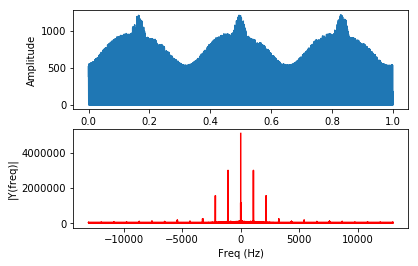

In [35]:
## plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,ghi)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(ghi_t),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

In [40]:
# frequency of the signal
fr = sorted(list(set(np.abs(frq[np.where(abs(ghi_t)>np.percentile(abs(ghi_t),99))[0]]))))
print('frequency of the signal: %s'%fr)

frequency of the signal: [0.0, 2.9998847439394525, 3.9998463252526033, 5.999769487878905, 9.9996158131315092, 11.99953897575781, 14.999423719697262, 15.999385301010413, 24.999039532828771, 25.999001114141922, 27.998924276768221, 33.998693764647129, 34.99865534596028, 42.998347996465483, 49.998079065657542, 52.997963809596996, 66.9974259479811, 71.997233854546863, 75.997080179799468, 87.996619155557269, 91.996465480809874, 102.99604287525453, 110.99573552575974, 125.995159245457, 126.99512082677016, 132.99489031464907, 140.99458296515428, 143.99446770909373, 149.99423719697262, 161.99377617273043, 164.99366091666988, 177.99316147374086, 198.99235468131701, 211.99185523838798, 225.99131737677209, 229.99116370202469, 230.99112528333785, 233.9910100272773, 234.99097160859046, 257.99008797879293, 259.99001114141919, 284.98905067424801, 289.98885858081371, 297.98855123131892, 325.98747550808719, 328.98736025202663, 334.98712973990553, 359.98616927273429, 361.9860924353606, 371.98570824849213

#### plot power

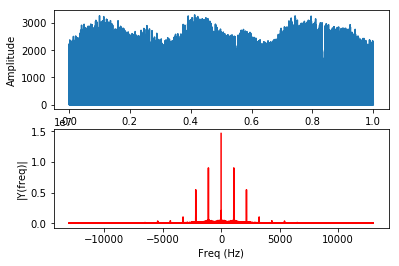

In [37]:
## plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,power)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(power_t),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
plt.show()

In [39]:
# frequency of the signal
fr = sorted(list(set(np.abs(frq[np.where(abs(power_t)>np.percentile(abs(power_t),99))[0]]))))
print('frequency of the signal: %s'%fr)

frequency of the signal: [0.0, 2.9998847439394525, 10.999577394444659, 11.99953897575781, 14.999423719697262, 15.999385301010413, 17.999308463636716, 24.999039532828771, 27.998924276768221, 34.99865534596028, 48.998117484344391, 52.997963809596996, 57.997771716162745, 59.997694878789048, 65.997464366667955, 67.997387529294258, 68.997349110607402, 75.997080179799468, 80.996888086365217, 83.996772830304664, 102.99604287525453, 103.99600445656769, 112.99565868838604, 117.99546659495179, 125.995159245457, 132.99489031464907, 136.99473663990167, 143.99446770909373, 149.99423719697262, 153.99408352222522, 159.99385301010415, 161.99377617273043, 198.99235468131701, 205.99208575050906, 212.99181681970111, 230.99112528333785, 233.9910100272773, 237.9908563525299, 259.99001114141919, 287.98893541818745, 309.98809020707677, 317.98778285758198, 319.98770602020829, 325.98747550808719, 328.98736025202663, 330.98728341465295, 348.98659187828963, 363.98601559798692, 447.98278842829154, 635.97556571516

#### Consequences:
- both signals have a similar pattern or frequencies.
- there are several mixed frequencies.

# HOURLY SIGNAL

In [41]:
# collect data
hour = 11
idata = data[data.hour == hour]

### Fourier transformation

In [42]:
# signals
ghi = idata.ghi.values
power = idata.power.values
# transformation
ghi_t = fft(ghi)
power_t = fft(power)
# time
n = len(idata)
#t = np.arange(n)
t = np.linspace(0, 1, n)
# frequencies
timestep = t[1] - t[0]
frq = np.fft.fftfreq(n, d=timestep)

#### ghi plot

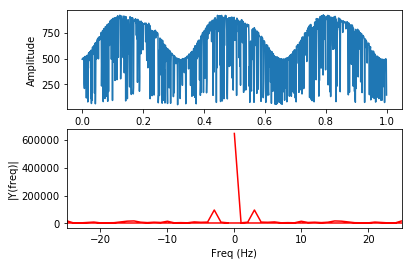

In [71]:
## plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,ghi)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(ghi_t),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([-25,25])
plt.show()

In [72]:
# frequency of the signal
fr = sorted(list(set(np.abs(frq[np.where(abs(ghi_t)>np.percentile(abs(ghi_t),99.8))[0]]))))
print('frequency of the signal: %s'%fr)

frequency of the signal: [0.0, 2.9972350230414748]


#### plot power

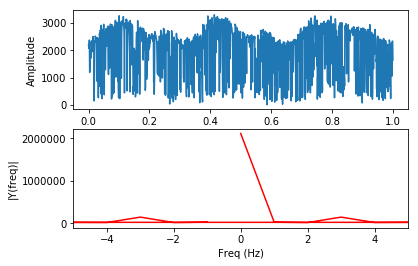

In [52]:
## plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,power)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(power_t),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([-5,5])
plt.show()

In [55]:
# frequency of the signal
fr = sorted(list(set(np.abs(frq[np.where(abs(power_t)>np.percentile(abs(ghi_t),99.9))[0]]))))
print('frequency of the signal: %s'%fr)

frequency of the signal: [0.0, 2.9972350230414748]


#### Consequences:
- Taking the 2 most import spikes, we have got frequencies 0 and 3Hz. 0 Hz is random behaibor, 3 Hz is the **annual solar cycle** which it is repeated 3 times in this dataset (3 years of data).
- In both signals the results are the same.

# 1 year of data

In [75]:
# collect data
dt1 = datetime(2014,1,1,0)
dt2 = datetime(2014,12,31,23)
ydata = data[(data.index>=dt1) & (data.index<=dt2)]

### Forerier transformation

In [76]:
# signals
ghi = ydata.ghi.values
power = ydata.power.values
# transformation
ghi_t = fft(ghi)
power_t = fft(power)
# time
n = len(ydata)
#t = np.arange(n)
t = np.linspace(0, 1, n)
# frequencies
timestep = t[1] - t[0]
frq = np.fft.fftfreq(n, d=timestep)

#### ghi plot

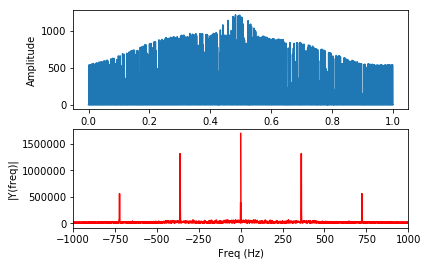

In [81]:
## plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,ghi)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(ghi_t),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([-1000,1000])
plt.show()

In [85]:
# frequency of the signal
fr = sorted(list(set(np.abs(frq[np.where(abs(ghi_t)>np.percentile(abs(ghi_t),99.95))[0]]))))
print('frequency of the signal: %s'%fr)

frequency of the signal: [0.0, 361.95832853689421, 723.91665707378843]


#### plot power

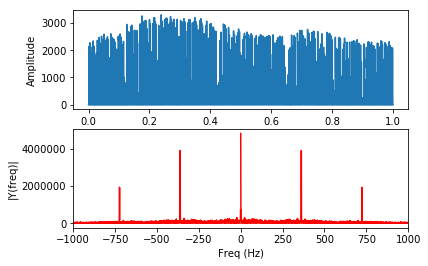

In [90]:
## plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)
ax[0].plot(t,power)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(power_t),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].set_xlim([-1000,1000])
plt.show()

In [92]:
# frequency of the signal
fr = sorted(list(set(np.abs(frq[np.where(abs(power_t)>np.percentile(abs(ghi_t),99.99))[0]]))))
print('frequency of the signal: %s'%fr)

frequency of the signal: [0.0, 361.95832853689421, 723.91665707378843]


#### Consequences:
- In both signal we have got a similar result.
- Finally results three different frequencies: 0, 362 and 724 Hz. 0Hz is random pattern. 362 Hz is the daily cicle (very close to 365) and 723 (it is just 362 x 2) is the intra-day pattern.